In [1]:
#load some packages

In [68]:
import dea_tools.waterbodies
import geopandas as gpd
import datacube 
import xarray as xr
import dea_conflux.__main__ as conflux
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
dc = datacube.Datacube(app ='conflux test')

/env/lib/python3.6/site-packages/datacube/drivers/postgres/_connections.py:87: SADeprecationWarning: Calling URL() directly is deprecated and will be disabled in a future release.  The public constructor for URL is now the URL.create() method.
  username=username, password=password,


In [15]:
hird_sw = dea_tools.waterbodies.get_waterbody('r1w7yzybk')


In [25]:
hird_geom = datacube.utils.geometry.Geometry(hird_sw.geometry[0].envelope, crs=hird_sw.crs)

In [107]:
time_ch = '1990-08-21'

In [134]:
dc.find_datasets(product='ga_ls5t_ard_3',
    measurements= ['nbart_red', 'nbart_green', 'nbart_blue', 'nbart_nir',
                     'nbart_swir_1', 'nbart_swir_2'
                  ],
    #time=('1990-03-07', '1990-03-09'),
   time = time_ch,
    output_crs=('EPSG:3577'),    
    #crs = ('EPSG:3577'),
    resolution=(-30, 30),
    group_by='solar_day',
    geopolygon=hird_geom)

[Dataset <id=b9ae395c-bde9-4195-91dc-4b63f3ea3352 product=ga_ls5t_ard_3 location=s3://dea-public-data/baseline/ga_ls5t_ard_3/094/085/1990/08/21/ga_ls5t_ard_3-0-0_094085_1990-08-21_final.stac-item.json>]

In [108]:
ls5_hird = dc.load(product='ga_ls5t_ard_3',
    measurements= ['nbart_red', 'nbart_green', 'nbart_blue', 'nbart_nir',
                     'nbart_swir_1', 'nbart_swir_2'
                  ],
    #time=('1990-03-07', '1990-03-09'),
   time = time_ch,
    output_crs=('EPSG:3577'),    
    #crs = ('EPSG:3577'),
    resolution=(-30, 30),
    group_by='solar_day',
    geopolygon=hird_geom)

In [109]:
wofs_hird = dc.load(product='ga_ls_wo_3',
    #time=('1990-03-07', '1990-03-09'),
    time = time_ch,
    output_crs=('EPSG:3577'),    
    #crs = ('EPSG:3577'),
    resolution=(-30, 30),
    group_by='solar_day',
    geopolygon=hird_geom)

In [110]:
fc_hird = dc.load(product='ga_ls_fc_3',
    #time=('1990-03-07', '1990-03-09'),
    time = time_ch,
    output_crs=('EPSG:3577'),    
    #crs = ('EPSG:3577'),
    resolution=(-30, 30),
    group_by='solar_day',
    geopolygon=hird_geom)

In [111]:
hird_bands = xr.merge([ls5_hird, wofs_hird, fc_hird])

In [112]:
hird_bands

<xarray.Dataset>
Dimensions:       (time: 1, x: 45, y: 60)
Coordinates:
  * time          (time) datetime64[ns] 1990-08-21T23:35:20.930383
  * y             (y) float64 -3.969e+06 -3.969e+06 ... -3.97e+06 -3.97e+06
  * x             (x) float64 1.09e+06 1.09e+06 1.09e+06 ... 1.091e+06 1.091e+06
    spatial_ref   int32 3577
Data variables:
    nbart_red     (time, y, x) int16 830 1202 1438 1589 1845 ... 825 828 775 829
    nbart_green   (time, y, x) int16 772 1111 1305 1478 1578 ... 702 704 710 771
    nbart_blue    (time, y, x) int16 597 961 1182 1320 1570 ... 562 466 602 662
    nbart_nir     (time, y, x) int16 1729 2217 2411 2506 ... 2055 2196 2419 2265
    nbart_swir_1  (time, y, x) int16 1226 1524 1709 1867 ... 1693 1698 1715 1700
    nbart_swir_2  (time, y, x) int16 642 948 1092 1291 1405 ... 1007 862 797 863
    water         (time, y, x) uint8 0 64 64 64 64 64 64 64 ... 0 0 0 0 0 0 0 0
    bs            (time, y, x) uint8 4 20 15 22 12 10 0 0 ... 20 7 10 14 1 0 0
    pv            (time, y, x) uint8 34 31 26 24 16 21 22 ... 43 43 37 42 52 46
    npv           (time, y, x) uint8 61 48 59 53 71 68 78 ... 49 46 47 55 47 53
    ue            (time, y, x) uint8 18 13 12 10 9 9 7 ... 13 13 14 15 16 16 15

In [125]:
wit_plugin = conflux.run_plugin('/home/jovyan/dea-conflux/examples/wit_ls5.conflux.py')

In [126]:
hird_transform = wit_plugin.transform(hird_bands)

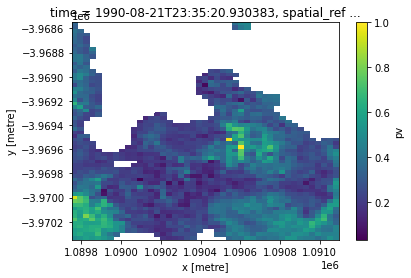

In [127]:
hird_transform.pv.plot()
plt.show()

In [128]:
hird_sum =wit_plugin.summarise(hird_transform)

In [129]:
hird_px = hird_bands.water.size

In [130]:
hird_sum /hird_px

<xarray.Dataset>
Dimensions:      ()
Coordinates:
    spatial_ref  int32 3577
Data variables:
    water        float64 0.03815
    wet          float64 0.1556
    bs           float64 0.108
    pv           float64 0.1165
    npv          float64 0.1758
    px_missing   float64 0.4059

In [131]:
hird_dict = (hird_sum/hird_px).to_dict()

In [132]:
sum (i['data'] for i in hird_dict['data_vars'].values()) *100

100.0

In [90]:
hird_dict['data_vars'].values

<function dict.values>